In [1]:
import os
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### DATA PREPROCESSING(ANALYSIS AND VISUALIZATION):

Enter A State Karnataka


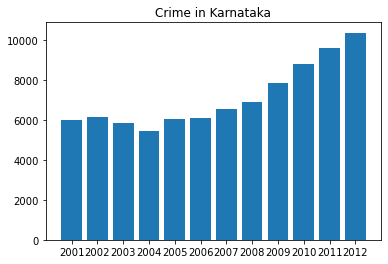

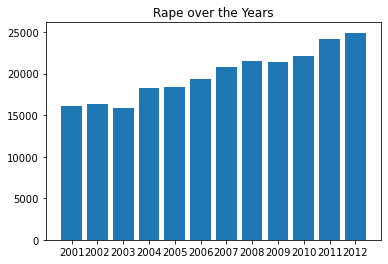

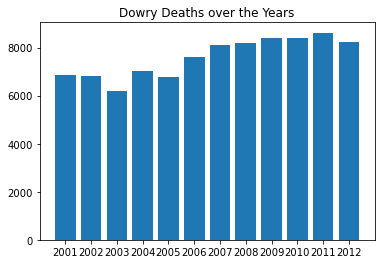

       Value Years                       Crime                      State
3876  143795  2001  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3879  154333  2004  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3880  155553  2005  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3881  164765  2006  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3882  185312  2007  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3883  195857  2008  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3884  203804  2009  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3885  213585  2010  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women
3886  228650  2011  TOTAL CRIMES AGAINST WOMEN  TOTAL Crime against Women


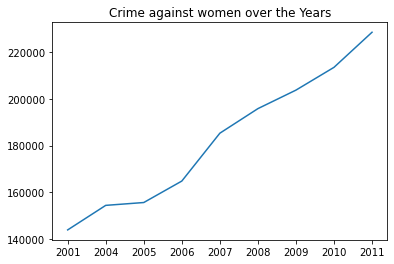

      Value Years                                            Crime  \
3035     12  2012                                             RAPE   
3131     49  2012                       TOTAL CRIMES AGAINST WOMEN   
3119      0  2012  INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT   
3107      2  2012                   IMMORAL TRAFFIC(PREVENTION)ACT   
3047      7  2012                           KIDNAPPING & ABDUCTION   

            State  
3035  A&N Islands  
3131  A&N Islands  
3119  A&N Islands  
3107  A&N Islands  
3047  A&N Islands  


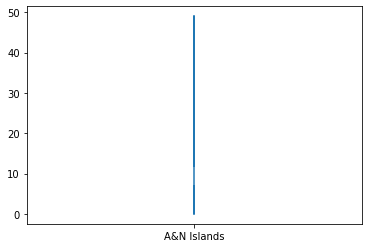

In [2]:
#Data Transformation
years=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
df = pd.read_csv("crime.csv")
labels = df['STATE'].unique()
crime = pd.DataFrame()
for i in labels:
    subdf=df[df.STATE == i]
    ucrime = subdf['CRIME'].unique()
    for j in ucrime:
        crimety=[]
        statety=[]
        for k in years:
            crimety.append(j)
            statety.append(i)
        subucrime = subdf[subdf.CRIME ==j][years]
        subucrime = subucrime.T
        subucrime.columns=['Value']
        subucrime['Years'] = years
        subucrime['Crime'] = crimety
        subucrime['State'] = statety
        crime=crime.append(subucrime,ignore_index =True)

def crimeState(states):
  stateCrime = crime[crime.State==states]
  X= stateCrime['Years']
  Y= stateCrime['Value']
  plt.bar(X,Y)
  plt.title('Crime in '+states)
  plt.show();
states = input("Enter A State ")
crimeState(states)

Rape = crime[crime.Crime=='RAPE']
X= Rape['Years']
Y=Rape['Value']
plt.bar(X,Y)
plt.title('Rape over the Years')
plt.show()

DOWRYDEATH = crime[crime.Crime=='DOWRY DEATH']
X=DOWRYDEATH['Years']
Y=DOWRYDEATH['Value']
plt.bar(X,Y)
plt.title('Dowry Deaths over the Years')
plt.show()

crimeWomen = crime[crime.Crime=='TOTAL CRIMES AGAINST WOMEN']
crimeWomenSorted = crimeWomen.sort_values(['Value']).tail(10).head(9)
print(crimeWomenSorted)
X= crimeWomenSorted['Years']
Y= crimeWomenSorted['Value']
plt.plot(X,Y)
plt.title('Crime against women over the Years')
plt.show()

crimeWomen = crime[crime.Crime=='TOTAL CRIMES AGAINST WOMEN']
crimeWomen = crime[crime.Years=='2012']
crimeWomenSorted = crimeWomen.sort_values(['State']).head(5)
print(crimeWomenSorted)
X= crimeWomenSorted['State']
Y= crimeWomenSorted['Value']
plt.plot(X,Y)
plt.show()





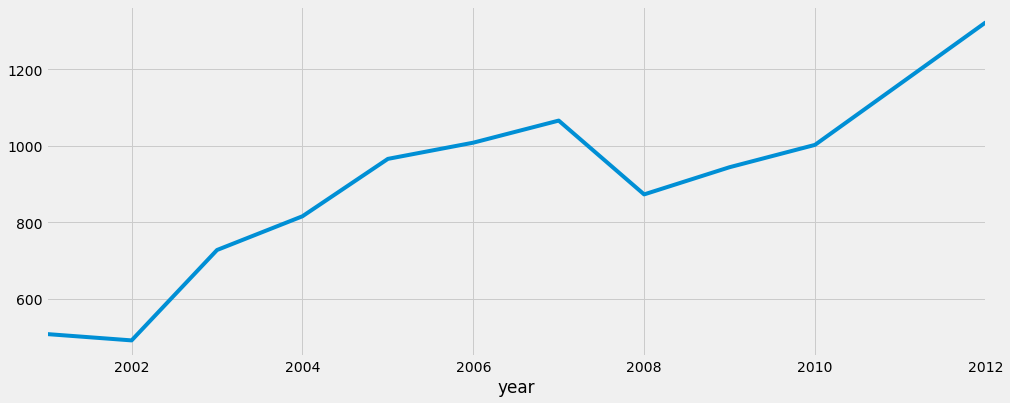

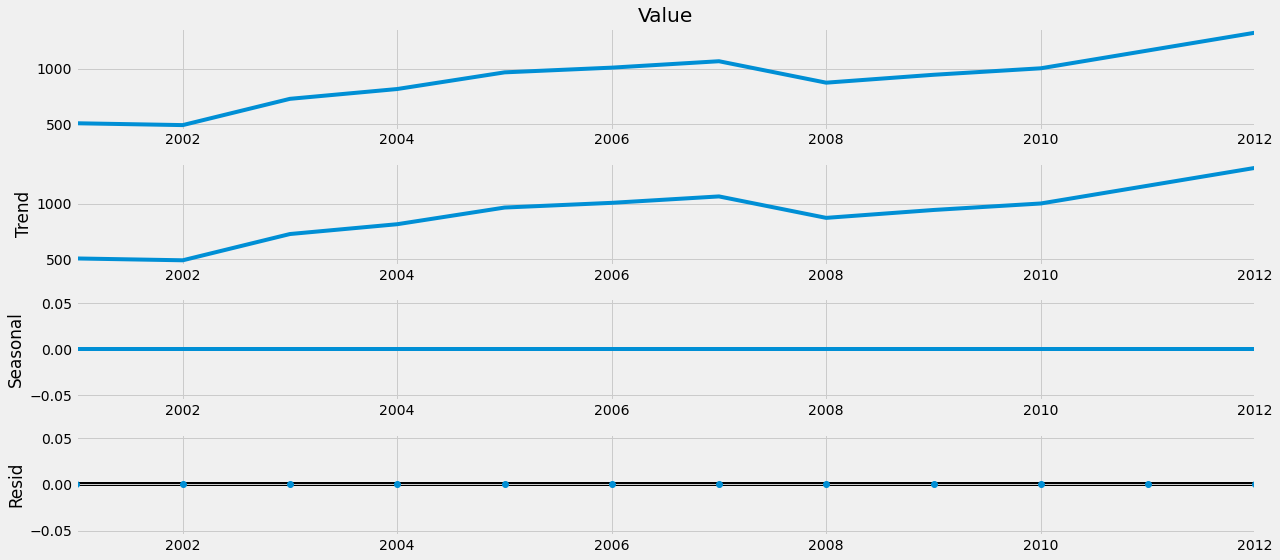

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


C:\Users\uzair\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0009   5.51e-06  -1.82e+05      0.000      -1.001      -1.001
ma.L1         -1.5846   1.59e-10  -9.94e+09      0.000      -1.585      -1.585
ar.S.L4       -0.9911   1.06e-05  -9.36e+04      0.000      -0.991      -0.991
sigma2      1.622e-05    1.4e-05      1.161      0.246   -1.12e-05    4.36e-05
The Mean Squared Error of our forecasts is 0.0


In [3]:
# Time Series Prediction

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams


df = pd.read_excel("crimeProcessed.xlsx")

RAPE = df.loc[df['Crime'] == 'RAPE']
RAPE = df.loc[df['State'] == 'Delhi UT']
RAPE['year'] = pd.to_datetime(RAPE['year'],format='%Y')
RAPE = RAPE.set_index('year')
y = RAPE['Value'].resample('YS').mean()
y.plot(figsize=(15, 6))
plt.show()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in
                list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 0, 4),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)
pred_ci = pred.conf_int()



y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



In [4]:
import time
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [5]:
df=pd.read_csv('crime.csv')

In [6]:
df

,STATE,CRIME,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Andhra Pradesh,RAPE,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341
1,Arunachal Pradesh,RAPE,33,38,31,42,35,37,48,42,59,47,42,46
2,Assam,RAPE,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716
3,Bihar,RAPE,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927
4,Chhattisgarh,RAPE,959,992,898,969,990,995,982,978,976,1012,1053,1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Daman & Diu,TOTAL CRIMES AGAINST WOMEN,10,8,10,7,10,9,11,15,13,14,11,11
320,Delhi UT,TOTAL CRIMES AGAINST WOMEN,2291,2216,3282,3677,4351,4544,4804,3938,4251,4518,5234,5959
321,Lakshadweep,TOTAL CRIMES AGAINST WOMEN,0,2,4,1,0,1,5,4,1,1,0,2
322,Puducherry,TOTAL CRIMES AGAINST WOMEN,119,141,121,110,127,149,179,129,106,115,89,61


In [7]:
one=df.loc[df['STATE'] == states]

In [8]:
print(one)

         STATE                                              CRIME  2001  2002  \
11   Karnataka                                               RAPE   293   292   
47   Karnataka                             KIDNAPPING & ABDUCTION   271   300   
83   Karnataka                                        DOWRY DEATH   220   233   
119  Karnataka  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MO...  1665  1648   
155  Karnataka                     INSULT TO THE MODESTY OF WOMEN    81   100   
191  Karnataka                    CRUELTY BY HUSBAND OR RELATIVES  1755  1826   
227  Karnataka                     IMMORAL TRAFFIC(PREVENTION)ACT  1356  1388   
263  Karnataka    INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT     0     0   
299  Karnataka                         TOTAL CRIMES AGAINST WOMEN  6002  6170   

     2003  2004  2005  2006  2007  2008  2009  2010  2011   2012  
11    321   291   343   400   436   446   509   586   636    621  
47    244   286   312   328   390   405   408   586   7

In [9]:
import pandas as pd
df1=pd.read_csv('traffic.csv')

In [10]:
import pandas as pd
df3=pd.read_csv('robbery 2013 data.csv')

In [11]:
df3['Crime']= 'Murder crime'

In [12]:
df3

,STATE/UT,YEAR,Crime,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2013,Murder crime,125,45935535,709,68874322,9820,665499800,31032,1556482643
1,Arunachal Pradesh,2013,Murder crime,24,1311900,75,14664367,196,19761328,514,74271909
2,Assam,2013,Murder crime,246,24191045,923,31715819,4291,79530358,10515,375861459
3,Bihar,2013,Murder crime,579,84117031,1521,71414206,4185,51108610,21423,450587436
4,Chhattisgarh,2013,Murder crime,47,24493880,351,29891305,3527,181971357,5189,224732391
5,Goa,2013,Murder crime,11,1102500,37,9118050,385,48071165,1138,100171932
6,Gujarat,2013,Murder crime,288,369550492,1429,154923763,4980,524026600,15313,1371908607
7,Haryana,2013,Murder crime,154,82730389,763,141245723,6121,428154134,18620,905521356
8,Himachal Pradesh,2013,Murder crime,14,4046770,14,2571860,932,72793077,818,80018471
9,Jammu & Kashmir,2013,Murder crime,6,97262,87,8128876,1387,98180318,1862,117171217


In [13]:
import pandas as pd
df4=pd.read_csv('murder_victims_2016.csv')

In [14]:
df4

,Unnamed: 0,STATE NAME,MURDERED CHILD (MALE),MURDERED CHILD (FEMALE),MURDERED CHILD TOTAL (TOTAL),MURDERED ADULT (MALE),MURDERED ADULT (FEMALE),MURDERED ADULT TOTAL (TOTAL),MURDERED TOTAL (MALE),MURDERED TOTAL (FEMALE),MURDERED TOTAL (TOTAL)
0,0,ANDHRA PRADESH,29,30,59,730,398,1128,759,428,1187
1,1,ARUNACHAL PRADESH,0,1,1,38,10,48,38,11,49
2,2,ASSAM,26,9,35,897,217,1114,923,226,1149
3,3,BIHAR,27,6,33,2240,320,2560,2267,326,2593
4,4,CHHATTISGARH,44,32,76,588,324,912,632,356,988
5,5,GOA,0,3,3,14,13,27,14,16,30
6,6,GUJARAT,55,39,94,826,256,1082,881,295,1176
7,7,HARYANA,36,28,64,819,207,1026,855,235,1090
8,8,HIMACHAL PRADESH,1,2,3,74,26,100,75,28,103
9,9,JAMMU & KASHMIR,4,2,6,139,23,162,143,25,168


In [15]:
df1

,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Poverty rate,Literacy rate,gender ratio(Female/1000 Males)
0,Andhra Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1332,871,349,405,681,657,612,357,279,548,497,472,9.20,67.66,992
1,Arunachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,0,0,0,0,0,0,0,0,0,0,0,1,34.67,66.95,920
2,Assam,IMMORAL TRAFFIC(PREVENTION)ACT,6,24,22,28,25,29,21,27,37,25,21,30,31.98,73.18,954
3,Bihar,IMMORAL TRAFFIC(PREVENTION)ACT,29,10,9,24,28,13,27,39,40,24,23,35,33.70,63.82,916
4,Chhattisgarh,IMMORAL TRAFFIC(PREVENTION)ACT,12,12,7,9,6,13,14,4,9,12,15,5,35.93,71.04,991
5,Goa,IMMORAL TRAFFIC(PREVENTION)ACT,28,25,25,28,38,26,10,14,23,16,18,40,5.09,87.40,968
6,Gujarat,IMMORAL TRAFFIC(PREVENTION)ACT,61,57,74,33,59,78,44,52,41,46,46,44,17.63,79.31,918
7,Haryana,IMMORAL TRAFFIC(PREVENTION)ACT,21,32,57,62,85,85,88,77,90,57,57,69,11.16,76.64,877
8,Himachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1,2,5,4,4,0,0,1,5,1,2,6,8.00,83.78,974
9,Jammu & Kashmir,IMMORAL TRAFFIC(PREVENTION)ACT,7,3,2,11,3,5,1,4,6,4,2,3,10.35,68.72,883


In [16]:
df1

,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,Poverty rate,Literacy rate,gender ratio(Female/1000 Males)
0,Andhra Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1332,871,349,405,681,657,612,357,279,548,497,472,9.20,67.66,992
1,Arunachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,0,0,0,0,0,0,0,0,0,0,0,1,34.67,66.95,920
2,Assam,IMMORAL TRAFFIC(PREVENTION)ACT,6,24,22,28,25,29,21,27,37,25,21,30,31.98,73.18,954
3,Bihar,IMMORAL TRAFFIC(PREVENTION)ACT,29,10,9,24,28,13,27,39,40,24,23,35,33.70,63.82,916
4,Chhattisgarh,IMMORAL TRAFFIC(PREVENTION)ACT,12,12,7,9,6,13,14,4,9,12,15,5,35.93,71.04,991
5,Goa,IMMORAL TRAFFIC(PREVENTION)ACT,28,25,25,28,38,26,10,14,23,16,18,40,5.09,87.40,968
6,Gujarat,IMMORAL TRAFFIC(PREVENTION)ACT,61,57,74,33,59,78,44,52,41,46,46,44,17.63,79.31,918
7,Haryana,IMMORAL TRAFFIC(PREVENTION)ACT,21,32,57,62,85,85,88,77,90,57,57,69,11.16,76.64,877
8,Himachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1,2,5,4,4,0,0,1,5,1,2,6,8.00,83.78,974
9,Jammu & Kashmir,IMMORAL TRAFFIC(PREVENTION)ACT,7,3,2,11,3,5,1,4,6,4,2,3,10.35,68.72,883


In [17]:
import pandas as pd
f_column = df3[['Crime','Dacoity (Section 395-398 IPC) - Number of cases registered',
                      'Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered',
                      'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered',
                      'Theft (Section 379-382 IPC) - Number of cases registered']]
df1 = pd.concat([df1,f_column], axis = 1)
df1

,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,Poverty rate,Literacy rate,gender ratio(Female/1000 Males),Crime,Dacoity (Section 395-398 IPC) - Number of cases registered,"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered",Theft (Section 379-382 IPC) - Number of cases registered
0,Andhra Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1332,871,349,405,681,657,612,357,...,497,472,9.20,67.66,992,Murder crime,125,709,9820,31032
1,Arunachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,0,0,0,0,0,0,0,0,...,0,1,34.67,66.95,920,Murder crime,24,75,196,514
2,Assam,IMMORAL TRAFFIC(PREVENTION)ACT,6,24,22,28,25,29,21,27,...,21,30,31.98,73.18,954,Murder crime,246,923,4291,10515
3,Bihar,IMMORAL TRAFFIC(PREVENTION)ACT,29,10,9,24,28,13,27,39,...,23,35,33.70,63.82,916,Murder crime,579,1521,4185,21423
4,Chhattisgarh,IMMORAL TRAFFIC(PREVENTION)ACT,12,12,7,9,6,13,14,4,...,15,5,35.93,71.04,991,Murder crime,47,351,3527,5189
5,Goa,IMMORAL TRAFFIC(PREVENTION)ACT,28,25,25,28,38,26,10,14,...,18,40,5.09,87.40,968,Murder crime,11,37,385,1138
6,Gujarat,IMMORAL TRAFFIC(PREVENTION)ACT,61,57,74,33,59,78,44,52,...,46,44,17.63,79.31,918,Murder crime,288,1429,4980,15313
7,Haryana,IMMORAL TRAFFIC(PREVENTION)ACT,21,32,57,62,85,85,88,77,...,57,69,11.16,76.64,877,Murder crime,154,763,6121,18620
8,Himachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1,2,5,4,4,0,0,1,...,2,6,8.00,83.78,974,Murder crime,14,14,932,818
9,Jammu & Kashmir,IMMORAL TRAFFIC(PREVENTION)ACT,7,3,2,11,3,5,1,4,...,2,3,10.35,68.72,883,Murder crime,6,87,1387,1862


In [18]:
import pandas as pd
f_column = df4[['MURDERED ADULT TOTAL (TOTAL)','MURDERED TOTAL (MALE)','MURDERED TOTAL (FEMALE)','MURDERED TOTAL (TOTAL)']]
df1 = pd.concat([df1,f_column], axis = 1)
df1

,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,...,gender ratio(Female/1000 Males),Crime,Dacoity (Section 395-398 IPC) - Number of cases registered,"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered",Theft (Section 379-382 IPC) - Number of cases registered,MURDERED ADULT TOTAL (TOTAL),MURDERED TOTAL (MALE),MURDERED TOTAL (FEMALE),MURDERED TOTAL (TOTAL)
0,Andhra Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1332,871,349,405,681,657,612,357,...,992,Murder crime,125,709,9820,31032,1128,759,428,1187
1,Arunachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,0,0,0,0,0,0,0,0,...,920,Murder crime,24,75,196,514,48,38,11,49
2,Assam,IMMORAL TRAFFIC(PREVENTION)ACT,6,24,22,28,25,29,21,27,...,954,Murder crime,246,923,4291,10515,1114,923,226,1149
3,Bihar,IMMORAL TRAFFIC(PREVENTION)ACT,29,10,9,24,28,13,27,39,...,916,Murder crime,579,1521,4185,21423,2560,2267,326,2593
4,Chhattisgarh,IMMORAL TRAFFIC(PREVENTION)ACT,12,12,7,9,6,13,14,4,...,991,Murder crime,47,351,3527,5189,912,632,356,988
5,Goa,IMMORAL TRAFFIC(PREVENTION)ACT,28,25,25,28,38,26,10,14,...,968,Murder crime,11,37,385,1138,27,14,16,30
6,Gujarat,IMMORAL TRAFFIC(PREVENTION)ACT,61,57,74,33,59,78,44,52,...,918,Murder crime,288,1429,4980,15313,1082,881,295,1176
7,Haryana,IMMORAL TRAFFIC(PREVENTION)ACT,21,32,57,62,85,85,88,77,...,877,Murder crime,154,763,6121,18620,1026,855,235,1090
8,Himachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1,2,5,4,4,0,0,1,...,974,Murder crime,14,14,932,818,100,75,28,103
9,Jammu & Kashmir,IMMORAL TRAFFIC(PREVENTION)ACT,7,3,2,11,3,5,1,4,...,883,Murder crime,6,87,1387,1862,162,143,25,168


In [19]:
(df1['Poverty rate'] >= 20) & (df1['Literacy rate'] <= 70)
df1['High crime']= (df1['Poverty rate'] >= 20) & (df1['Literacy rate'] <= 70)

In [20]:
df1

,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,...,Crime,Dacoity (Section 395-398 IPC) - Number of cases registered,"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered",Theft (Section 379-382 IPC) - Number of cases registered,MURDERED ADULT TOTAL (TOTAL),MURDERED TOTAL (MALE),MURDERED TOTAL (FEMALE),MURDERED TOTAL (TOTAL),High crime
0,Andhra Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1332,871,349,405,681,657,612,357,...,Murder crime,125,709,9820,31032,1128,759,428,1187,False
1,Arunachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,0,0,0,0,0,0,0,0,...,Murder crime,24,75,196,514,48,38,11,49,True
2,Assam,IMMORAL TRAFFIC(PREVENTION)ACT,6,24,22,28,25,29,21,27,...,Murder crime,246,923,4291,10515,1114,923,226,1149,False
3,Bihar,IMMORAL TRAFFIC(PREVENTION)ACT,29,10,9,24,28,13,27,39,...,Murder crime,579,1521,4185,21423,2560,2267,326,2593,True
4,Chhattisgarh,IMMORAL TRAFFIC(PREVENTION)ACT,12,12,7,9,6,13,14,4,...,Murder crime,47,351,3527,5189,912,632,356,988,False
5,Goa,IMMORAL TRAFFIC(PREVENTION)ACT,28,25,25,28,38,26,10,14,...,Murder crime,11,37,385,1138,27,14,16,30,False
6,Gujarat,IMMORAL TRAFFIC(PREVENTION)ACT,61,57,74,33,59,78,44,52,...,Murder crime,288,1429,4980,15313,1082,881,295,1176,False
7,Haryana,IMMORAL TRAFFIC(PREVENTION)ACT,21,32,57,62,85,85,88,77,...,Murder crime,154,763,6121,18620,1026,855,235,1090,False
8,Himachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1,2,5,4,4,0,0,1,...,Murder crime,14,14,932,818,100,75,28,103,False
9,Jammu & Kashmir,IMMORAL TRAFFIC(PREVENTION)ACT,7,3,2,11,3,5,1,4,...,Murder crime,6,87,1387,1862,162,143,25,168,False


In [21]:
High_crime = {True:1,False:0}

In [22]:
df1['High crime']=df1['High crime'].map(High_crime)

In [23]:
df1

,State,Crime,2001,2002,2003,2004,2005,2006,2007,2008,...,Crime,Dacoity (Section 395-398 IPC) - Number of cases registered,"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered",Theft (Section 379-382 IPC) - Number of cases registered,MURDERED ADULT TOTAL (TOTAL),MURDERED TOTAL (MALE),MURDERED TOTAL (FEMALE),MURDERED TOTAL (TOTAL),High crime
0,Andhra Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1332,871,349,405,681,657,612,357,...,Murder crime,125,709,9820,31032,1128,759,428,1187,0
1,Arunachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,0,0,0,0,0,0,0,0,...,Murder crime,24,75,196,514,48,38,11,49,1
2,Assam,IMMORAL TRAFFIC(PREVENTION)ACT,6,24,22,28,25,29,21,27,...,Murder crime,246,923,4291,10515,1114,923,226,1149,0
3,Bihar,IMMORAL TRAFFIC(PREVENTION)ACT,29,10,9,24,28,13,27,39,...,Murder crime,579,1521,4185,21423,2560,2267,326,2593,1
4,Chhattisgarh,IMMORAL TRAFFIC(PREVENTION)ACT,12,12,7,9,6,13,14,4,...,Murder crime,47,351,3527,5189,912,632,356,988,0
5,Goa,IMMORAL TRAFFIC(PREVENTION)ACT,28,25,25,28,38,26,10,14,...,Murder crime,11,37,385,1138,27,14,16,30,0
6,Gujarat,IMMORAL TRAFFIC(PREVENTION)ACT,61,57,74,33,59,78,44,52,...,Murder crime,288,1429,4980,15313,1082,881,295,1176,0
7,Haryana,IMMORAL TRAFFIC(PREVENTION)ACT,21,32,57,62,85,85,88,77,...,Murder crime,154,763,6121,18620,1026,855,235,1090,0
8,Himachal Pradesh,IMMORAL TRAFFIC(PREVENTION)ACT,1,2,5,4,4,0,0,1,...,Murder crime,14,14,932,818,100,75,28,103,0
9,Jammu & Kashmir,IMMORAL TRAFFIC(PREVENTION)ACT,7,3,2,11,3,5,1,4,...,Murder crime,6,87,1387,1862,162,143,25,168,0


In [24]:
import numpy as np
df1.isnull().values.any()

False

In [25]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [26]:
df1.to_csv('Crimedata.csv')

In [27]:
df1.to_csv('TestingCrimedata.csv')

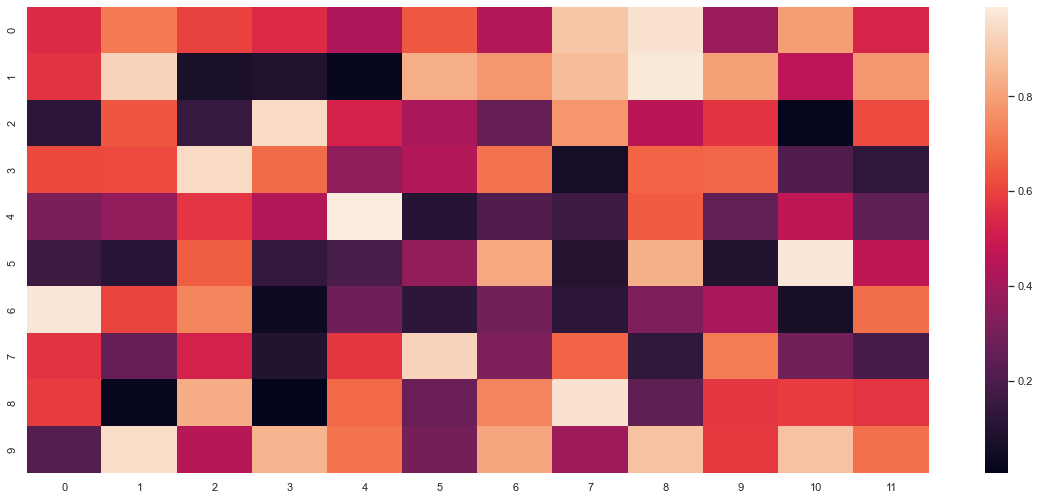

In [28]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
df1 = np.random.rand(10, 12)
ax = sns.heatmap(df1)

In [29]:
df5=pd.read_csv('Crimedata.csv')

In [30]:
# Training and testing part
from sklearn.model_selection import train_test_split
feature_col_names = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','Poverty rate','Literacy rate','gender ratio(Female/1000 Males)','Dacoity (Section 395-398 IPC) - Number of cases registered','Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered',
'Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered',
'Theft (Section 379-382 IPC) - Number of cases registered',
'MURDERED ADULT TOTAL (TOTAL)',
'MURDERED TOTAL (MALE)',
'MURDERED TOTAL (FEMALE)',
'MURDERED TOTAL (TOTAL)']
predict_class_names = ['High crime']
x=df5[feature_col_names].values
y=df5[predict_class_names].values
split_test_size =0.3

In [31]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=split_test_size, random_state=101)

In [32]:
# checking whether training and testing part is divided into 70% and 30%
print("{0:0.2f}% in training set".format((len(x_train)/len(df5.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df5.index)) * 100))

68.57% in training set
31.43% in test set


# MACHINE LEARNING:

### GAUSSIAN NAIVE BAYES(GNB):

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb_model = GaussianNB()

In [35]:
gnb_model.fit(x_train,y_train)

GaussianNB()

In [36]:
gnb_predictions = gnb_model.predict(x_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,gnb_predictions))

[[9 1]
 [1 0]]


In [38]:
print(classification_report(y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.00      0.00      0.00         1

    accuracy                           0.82        11
   macro avg       0.45      0.45      0.45        11
weighted avg       0.82      0.82      0.82        11



### SUPPORT VECTOR MACHINE(SVM):

In [39]:
from sklearn.svm import SVC

In [40]:
svm_model = SVC()

In [41]:
svm_model.fit(x_train,y_train)

SVC()

In [42]:
svm_predictions = svm_model.predict(x_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(confusion_matrix(y_test,svm_predictions))

[[10  0]
 [ 1  0]]


In [45]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.00      0.00      0.00         1

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



### DECISION TREE(DT):

In [46]:
#Decision tree alogrithm
from sklearn.tree import DecisionTreeClassifier#Random forest algorithm
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(x_train,y_train)
dt_predictions = dtree.predict(x_test)

In [48]:
# finding accuracy score for training and testing part
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dtree.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dtree.predict(x_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.9090909090909091


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.00      0.00      0.00         1

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



In [50]:
print(confusion_matrix(y_test,dt_predictions))

[[10  0]
 [ 1  0]]


### RANDOM FOREST(RF):

In [51]:
#Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [52]:
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [53]:
#Confusion matrix
print(confusion_matrix(y_test,rfc_pred))

[[10  0]
 [ 1  0]]


In [54]:
#Classification report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.00      0.00      0.00         1

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



### K NEAREST NEIGHBORS(KNN):

In [55]:
# Knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [57]:
knn_pred = knn.predict(x_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(confusion_matrix(y_test,knn_pred))

[[10  0]
 [ 1  0]]


In [60]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.00      0.00      0.00         1

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



### BEST ML MODEL:

In [61]:
import joblib
joblib.dump(rfc,'BestModel.pkl')

['BestModel.pkl']